# PlayQ Data Analyst Homework


### Swapnil Nikam

### 19 April 2020

### Table of Contents
- [Introduction](#intro)
- [Data Cleaning](#Cleaning)
- [Data Visualization](#Visualization)
- [Conclusion](#conclusion)

<a id='intro'></a>
## Introduction

> PlayQ has launched new feature in single-player mobile game.The feature was made available to a sample of players as a part of an A/B experiment from 2018-01-17 to 2018-01-24. 

> The overall goal of the feature was to increase player engagement with the game and revenue. 

<a id='Cleaning'></a>
## Data Cleaning

In [356]:
# import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import mlab
from scipy import stats
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [188]:
#Read data
data=pd.read_csv("D:\\Full Time\\PlayQ\\data_analyst_homework_data.csv")

In [189]:
data.head()

,user_id,feature_enabled,experiment_selected_date,event_date,games_played,revenue
0,1,0,2018-01-17,2018-01-15,31,0.0
1,1,0,2018-01-17,2018-01-16,8,0.0
2,1,0,2018-01-17,2018-01-17,27,0.0
3,1,0,2018-01-17,2018-01-18,20,0.0
4,1,0,2018-01-17,2018-01-19,39,0.0


In [190]:
data.shape

(12118, 6)

In [191]:
# Let's take a peak into the data's basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12118 entries, 0 to 12117
Data columns (total 6 columns):
user_id                     12118 non-null int64
feature_enabled             12118 non-null int64
experiment_selected_date    12118 non-null object
event_date                  12118 non-null object
games_played                12118 non-null int64
revenue                     12118 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 568.1+ KB


In [192]:
# Changing the format to datetime
data.experiment_selected_date = pd.to_datetime(data.experiment_selected_date)
data.event_date = pd.to_datetime(data.event_date)

In [193]:
#descriptive statistics of data
data.describe()

,user_id,feature_enabled,games_played,revenue
count,12118.000000,12118.000000,12118.000000,12118.000000
mean,5997.205397,0.512543,11.821340,0.121562
std,3478.866850,0.499863,18.373367,1.432344
min,1.000000,0.000000,0.000000,0.000000
25%,2960.000000,0.000000,5.000000,0.000000
50%,5979.000000,1.000000,9.000000,0.000000
75%,9014.750000,1.000000,17.000000,0.000000
max,12039.000000,1.000000,999.000000,71.970000


In [194]:
# find count of duplicate records
data.duplicated().sum()

70

In [195]:
# duplicate records
duplicateRows = data[data.duplicated()]
duplicateRows

,user_id,feature_enabled,experiment_selected_date,event_date,games_played,revenue
2199,2199,0,2018-01-17,2018-01-15,5,0.00
2200,2199,0,2018-01-17,2018-01-15,5,0.00
2201,2199,0,2018-01-17,2018-01-15,5,0.00
2202,2199,0,2018-01-17,2018-01-15,5,0.00
2203,2199,0,2018-01-17,2018-01-15,5,0.00
2204,2199,0,2018-01-17,2018-01-15,5,0.00
2205,2199,0,2018-01-17,2018-01-15,5,0.00
2207,2199,0,2018-01-17,2018-01-16,14,0.00
2208,2199,0,2018-01-17,2018-01-16,14,0.00
2209,2199,0,2018-01-17,2018-01-16,14,0.00


In [196]:
#delete duplicates by keeping one record
data.drop_duplicates(keep='first',inplace=True) 

In [197]:
# Test whether record has deleted
data.duplicated().sum()

0

In [198]:
# NaN values?
data.isna().sum()

user_id                     0
feature_enabled             0
experiment_selected_date    0
event_date                  0
games_played                0
revenue                     0
dtype: int64

As some records showing login date ealier than experiement selected date which will be not useful for our analysis.

In [199]:
data[data['experiment_selected_date']>data['event_date']]

,user_id,feature_enabled,experiment_selected_date,event_date,games_played,revenue
0,1,0,2018-01-17,2018-01-15,31,0.00
1,1,0,2018-01-17,2018-01-16,8,0.00
11,12,0,2018-01-17,2018-01-15,32,0.00
12,12,0,2018-01-17,2018-01-16,38,0.00
21,22,1,2018-01-17,2018-01-15,27,0.00
22,22,1,2018-01-17,2018-01-16,23,0.00
32,33,0,2018-01-17,2018-01-15,5,0.00
33,33,0,2018-01-17,2018-01-16,5,0.00
41,42,0,2018-01-17,2018-01-15,1,0.00
42,42,0,2018-01-17,2018-01-16,5,0.00


In [200]:
indexNames=data[data['experiment_selected_date']>data['event_date']].index
 
# Delete these row indexes from dataFrame
data.drop(indexNames , inplace=True)

In [201]:
data[data['experiment_selected_date']<"2018-01-17"]

,user_id,feature_enabled,experiment_selected_date,event_date,games_played,revenue
1647,1646,1,2018-01-16,2018-01-16,23,0.00
1648,1646,1,2018-01-16,2018-01-17,25,0.00
1649,1646,1,2018-01-16,2018-01-18,24,0.00
1650,1646,1,2018-01-16,2018-01-19,31,0.00
1651,1646,1,2018-01-16,2018-01-20,33,0.00
1652,1646,1,2018-01-16,2018-01-21,28,0.00
1653,1646,1,2018-01-16,2018-01-22,4,0.00
1654,1646,1,2018-01-16,2018-01-23,19,0.00
1655,1646,1,2018-01-16,2018-01-24,32,0.00
3455,3384,0,2018-01-16,2018-01-16,22,0.00


Experiement period is from 17-Jan-2018 to 24-Jan-2018 however some records has experiment date before 17-Jan-2018

In [202]:
indexNames=data[data['experiment_selected_date']<"2018-01-17"].index
 
# Delete these row indexes from dataFrame
data.drop(indexNames , inplace=True)

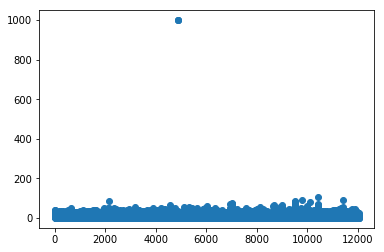

In [203]:
# Outlier based on games played
plt.scatter(data = data,x = 'user_id', y = 'games_played')

Above scatter plot showing suspious data with games played 999 which looks like outlier

In [204]:
data[data['user_id']==4875]

,user_id,feature_enabled,experiment_selected_date,event_date,games_played,revenue
4949,4875,1,2018-01-18,2018-01-18,999,0.0
4950,4875,1,2018-01-18,2018-01-20,999,0.0
4951,4875,1,2018-01-18,2018-01-22,999,0.0


In [205]:
indexNames=data[data['user_id']==4875].index
 
# Delete these row indexes from dataFrame
data.drop(indexNames , inplace=True)

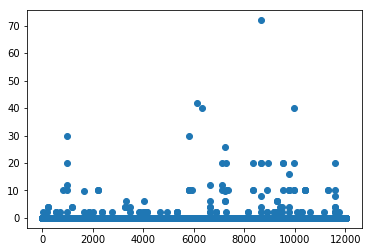

In [206]:
# Outlier based on revenue
plt.scatter(data = data,x = 'user_id', y = 'revenue')

Scatter plot showing revenue greater than 70 which is outlier

In [207]:
data[data['revenue']>70]

,user_id,feature_enabled,experiment_selected_date,event_date,games_played,revenue
8746,8672,1,2018-01-17,2018-01-17,34,71.97


In [208]:
indexNames=data[data['revenue']>70].index
 
# Delete these row indexes from dataFrame
data.drop(indexNames , inplace=True)

In [209]:
Cleaned_data = data.to_csv (r'D:\\Full Time\\PlayQ\\Cleaned_data.csv', index = None, header=True) 

In [210]:
data.shape

(9918, 6)

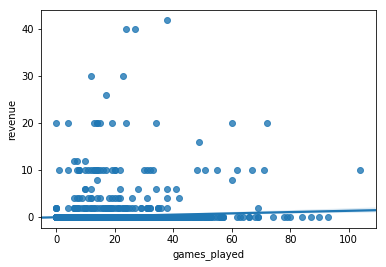

In [211]:
sns.regplot(data = data,x = 'games_played', y = 'revenue')

In [212]:
# Counting the number of players in each AB group.
data.groupby('feature_enabled').count()

,user_id,experiment_selected_date,event_date,games_played,revenue
feature_enabled,,,,,
0,4819,4819,4819,4819,4819
1,5099,5099,5099,5099,5099


<a id='Visualization'></a>
## Data Visualization

### The distribution of games played

Text(0, 0.5, 'user_number')

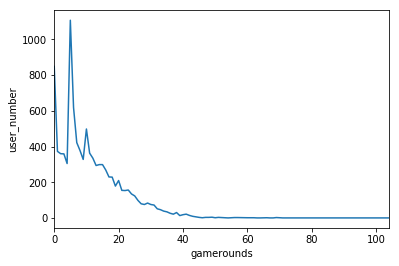

In [213]:

# This command makes plots appear in the notebook
%matplotlib inline

# Counting the number of players for each number of gamerounds 
plot_df = data.groupby('games_played')['user_id'].count()

# Plotting the distribution of players that played 0 to 100 game rounds
ax = plot_df.head(100).plot()
ax.set_xlabel("gamerounds")
ax.set_ylabel("user_number")

In [214]:
# number of players for each gamerounds
plot_df.head()

games_played
0    848
1    373
2    360
3    359
4    305
Name: user_id, dtype: int64

In [215]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9918 entries, 2 to 12117
Data columns (total 6 columns):
user_id                     9918 non-null int64
feature_enabled             9918 non-null int64
experiment_selected_date    9918 non-null datetime64[ns]
event_date                  9918 non-null datetime64[ns]
games_played                9918 non-null int64
revenue                     9918 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(3)
memory usage: 542.4 KB


In [216]:
data.head()

,user_id,feature_enabled,experiment_selected_date,event_date,games_played,revenue
2,1,0,2018-01-17,2018-01-17,27,0.0
3,1,0,2018-01-17,2018-01-18,20,0.0
4,1,0,2018-01-17,2018-01-19,39,0.0
5,1,0,2018-01-17,2018-01-20,23,0.0
6,1,0,2018-01-17,2018-01-21,16,0.0


In [217]:
#Pivote table with feature_enabled,games_played,revenue
df_1 = data.groupby('feature_enabled')['games_played','revenue'].sum()

In [218]:
df_1

,games_played,revenue
feature_enabled,,
0,53755,323.23
1,59690,732.46


In [266]:
# conversion rate
test_result_summary_games = data.groupby(by=['feature_enabled']).agg({'games_played':['count','sum']})
test_result_summary_games['conv']=(test_result_summary_games.games_played['sum']/test_result_summary_games.games_played['count'])
test_result_summary_revenue = data.groupby(by=['feature_enabled']).agg({'revenue':['count','sum']})
test_result_summary_revenue['conv']=(test_result_summary_revenue.revenue['sum']/test_result_summary_revenue.revenue['count'])
result=pd.concat([test_result_summary_games,test_result_summary_revenue],axis=1)
result

games_played              conv revenue              conv
                       count    sum              count     sum          
feature_enabled                                                         
0                       4819  53755  11.154804    4819  323.23  0.067074
1                       5099  59690  11.706217    5099  732.46  0.143648

In [289]:
#p values
def get_pvalue(con_conv, test_conv, con_size, test_size):  
    lift =  - abs(test_conv - con_conv)

    scale_one = con_conv * (1 - con_conv) * (1 / con_size)
    scale_two = test_conv * (1 - test_conv) * (1 / test_size)
    scale_val = (scale_one + scale_two)**0.5

    p_value = 2 * stats.norm.cdf(lift, loc = 0, scale = scale_val )

    return p_value

In [280]:
#p value for games played
p_value_games_played = get_pvalue(con_conv=11.154804, test_conv=11.706217, con_size=4819, test_size=5099)
print(p_value_games_played)
if p_value_games_played >= 0.05:
    print("Not Significant")
else:
    print("Significant Result")

0.9999999999999999
Not Significant


In [281]:
#p value for revenue
p_value_revenue = get_pvalue(con_conv=0.067074, test_conv=0.143648, con_size=4819, test_size=5099)
print(p_value_revenue)
if p_value_revenue >= 0.05:
    print("Not Significant")
else:
    print("Significant Result")

3.086924109302326e-36
Significant Result


In [292]:
# confidence interval
def get_ci(value, cl, sd):
  loc = stats.norm.ppf(1 - cl/2)
  rng_val = stats.norm.cdf(loc - value/sd)

  lwr_bnd = value - rng_val
  upr_bnd = value + rng_val 

  return_val = (lwr_bnd, upr_bnd)
  return(return_val)

In [293]:
#CI for games played
# Calculate the mean of our lift distribution 
con_conv=11.154804
test_conv=11.706217
con_size=4819
test_size=5099
lift_mean = test_conv - con_conv

# Calculate variance and standard deviation 
lift_variance = (1 - test_conv) * test_conv /test_size + (1 - con_conv) * con_conv / con_size
lift_sd = lift_variance**0.5

# Find the confidence intervals with cl = 0.95
confidence_interval = get_ci(lift_mean, 0.95, lift_sd)
print(confidence_interval)

((-0.5363830149312223-4.645753004344312j), (1.6392090149312226+4.645753004344312j))


In [294]:
#CI for revenue
# Calculate the mean of our lift distribution 
con_conv=0.067074
test_conv=0.143648
con_size=4819
test_size=5099
lift_mean = test_conv - con_conv

# Calculate variance and standard deviation 
lift_variance = (1 - test_conv) * test_conv /test_size + (1 - con_conv) * con_conv / con_size
lift_sd = lift_variance**0.5

# Find the confidence intervals with cl = 0.95
confidence_interval = get_ci(lift_mean, 0.95, lift_sd)
print(confidence_interval)

(0.076574, 0.076574)


In [334]:
con=data[data['feature_enabled']==0]
var=data[data['feature_enabled']==1]

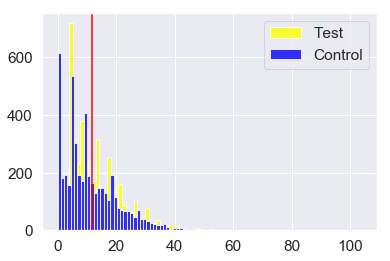

In [350]:
#plot our conversion rate data for each group
plt.hist(var['games_played'],color='yellow',alpha=0.8,bins=80,label='Test')
plt.hist(con['games_played'],color='blue',alpha=0.8,bins=80,label='Control')
plt.legend(loc='upper right')
plt.axvline(x=np.mean(var.games_played),color='red')
plt.show()

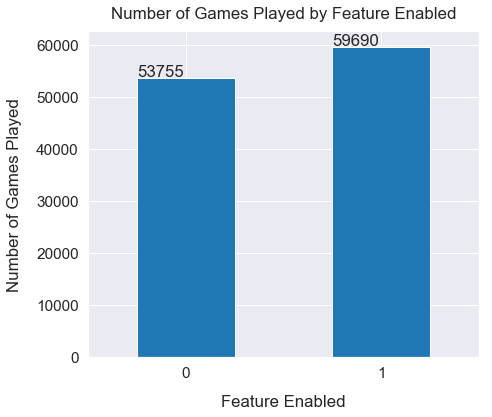

In [224]:
# Number of Games Played by Feature Enabled
base_color = sns.color_palette()[0]
sns.set(font_scale=1.4)
ax=df_1["games_played"].plot(kind='bar', figsize=(7, 6), rot=0,color=base_color)
plt.xlabel("Feature Enabled", labelpad=14)
plt.ylabel("Number of Games Played", labelpad=14)
plt.title("Number of Games Played by Feature Enabled", y=1.02);
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1, p.get_height() * 1.005))


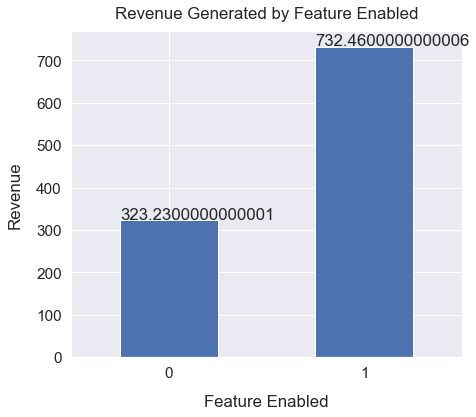

In [232]:
# Revenue Generated by Feature Enabled
base_color = sns.color_palette()[0]
sns.set(font_scale=1.4)
ax=df_1["revenue"].plot(kind='bar', figsize=(7, 6), rot=0,color=base_color)
plt.xlabel("Feature Enabled", labelpad=14)
plt.ylabel("Revenue", labelpad=14)
plt.title("Revenue Generated by Feature Enabled", y=1.02);
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1, p.get_height() * 1.005))

In [233]:
# Percentage change
df_1.pct_change()

,games_played,revenue
feature_enabled,,
0,NaN,NaN
1,0.110408,1.266064


In [235]:
#Number of visits by user
data['visits'] = (data['event_date'] - data['experiment_selected_date']).dt.days + 1

data.head(10)

,user_id,feature_enabled,experiment_selected_date,event_date,games_played,revenue,visits
2,1,0,2018-01-17,2018-01-17,27,0.0,1
3,1,0,2018-01-17,2018-01-18,20,0.0,2
4,1,0,2018-01-17,2018-01-19,39,0.0,3
5,1,0,2018-01-17,2018-01-20,23,0.0,4
6,1,0,2018-01-17,2018-01-21,16,0.0,5
7,1,0,2018-01-17,2018-01-22,29,0.0,6
8,1,0,2018-01-17,2018-01-23,20,0.0,7
9,1,0,2018-01-17,2018-01-24,24,0.0,8
10,11,1,2018-01-22,2018-01-22,5,0.0,1
13,12,0,2018-01-17,2018-01-17,42,0.0,1


In [244]:
group = data.groupby(['feature_enabled','experiment_selected_date', 'visits'])

cohort_data = group['user_id'].size()

cohort_data = cohort_data.reset_index()

feature_0=cohort_data[cohort_data["feature_enabled"]==0]
feature_1=cohort_data[cohort_data["feature_enabled"]==1]

In [250]:
cohort_0_counts = feature_0.pivot(index='experiment_selected_date', columns='visits', values='user_id')

# We need the base for our retention rate calculation
# Here we just take the first column of cohort_counts
base = cohort_0_counts[1]

# And now we apply the divide method to our cohort_counts, dividing it by the base
retention_feature_0 = cohort_0_counts.divide(base, axis=0).round(3)

In [254]:
cohort_1_counts = feature_1.pivot(index='experiment_selected_date', columns='visits', values='user_id')

# We need the base for our retention rate calculation
# Here we just take the first column of cohort_counts
base = cohort_1_counts[1]

# And now we apply the divide method to our cohort_counts, dividing it by the base
retention_feature_1 = cohort_1_counts.divide(base, axis=0).round(3)

In [255]:
cohort_0_counts

visits,1,2,3,4,5,6,7,8
experiment_selected_date,,,,,,,,
2018-01-17,501.0,414.0,411.0,390.0,401.0,414.0,399.0,387.0
2018-01-18,163.0,96.0,99.0,104.0,106.0,94.0,91.0,NaN
2018-01-19,101.0,54.0,41.0,43.0,37.0,37.0,NaN,NaN
2018-01-20,67.0,28.0,29.0,23.0,22.0,NaN,NaN,NaN
2018-01-21,66.0,23.0,19.0,27.0,NaN,NaN,NaN,NaN
2018-01-22,49.0,21.0,13.0,NaN,NaN,NaN,NaN,NaN
2018-01-23,33.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-24,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [256]:
cohort_1_counts

visits,1,2,3,4,5,6,7,8
experiment_selected_date,,,,,,,,
2018-01-17,529.0,445.0,445.0,426.0,424.0,436.0,423.0,429.0
2018-01-18,167.0,100.0,100.0,93.0,96.0,94.0,89.0,NaN
2018-01-19,79.0,42.0,37.0,38.0,35.0,38.0,NaN,NaN
2018-01-20,92.0,44.0,38.0,33.0,42.0,NaN,NaN,NaN
2018-01-21,59.0,23.0,25.0,28.0,NaN,NaN,NaN,NaN
2018-01-22,45.0,22.0,18.0,NaN,NaN,NaN,NaN,NaN
2018-01-23,39.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-24,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


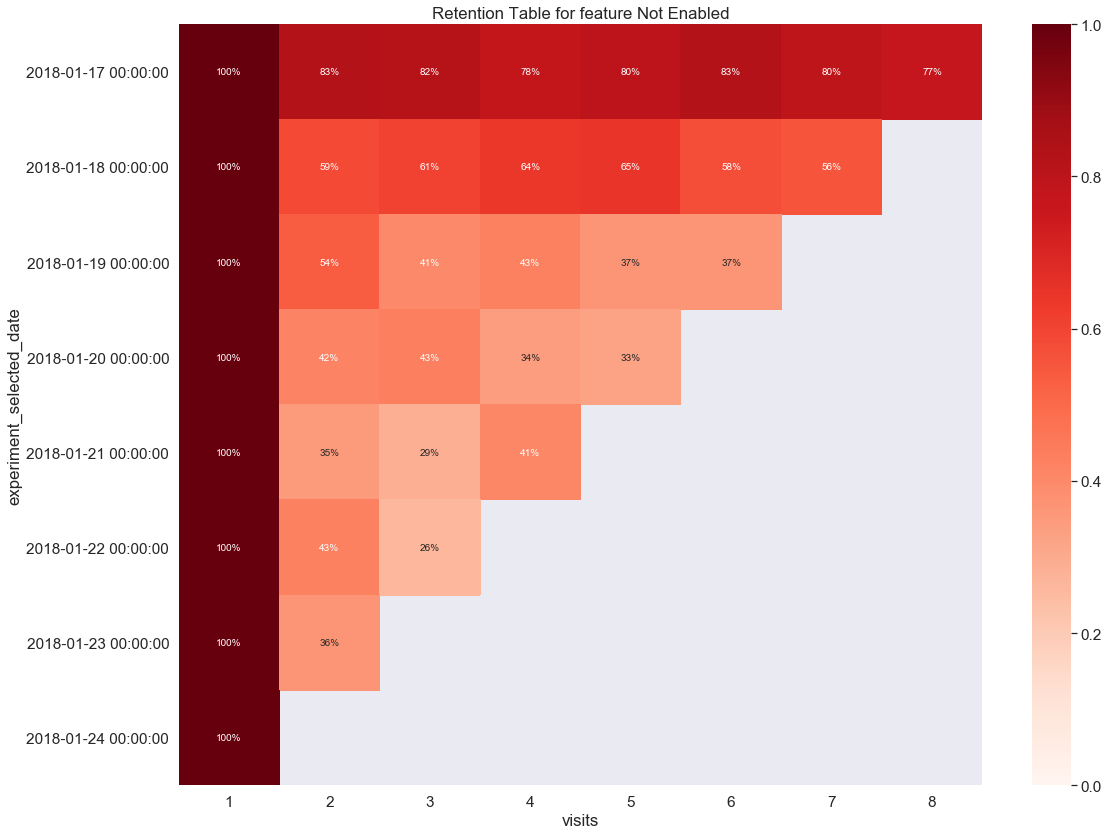

In [352]:
# Retention Rate heatmap
plt.figure(figsize=(18,14))
plt.title('Retention Table for feature Not Enabled')
ax = sns.heatmap(data=retention_feature_0, annot=True, fmt='.0%', vmin=0.0, vmax=1,cmap='Reds')
ax.set_yticklabels(retention.index)
fig=ax.get_figure()
fig.savefig("Retention_Rate_0.png")

plt.show()

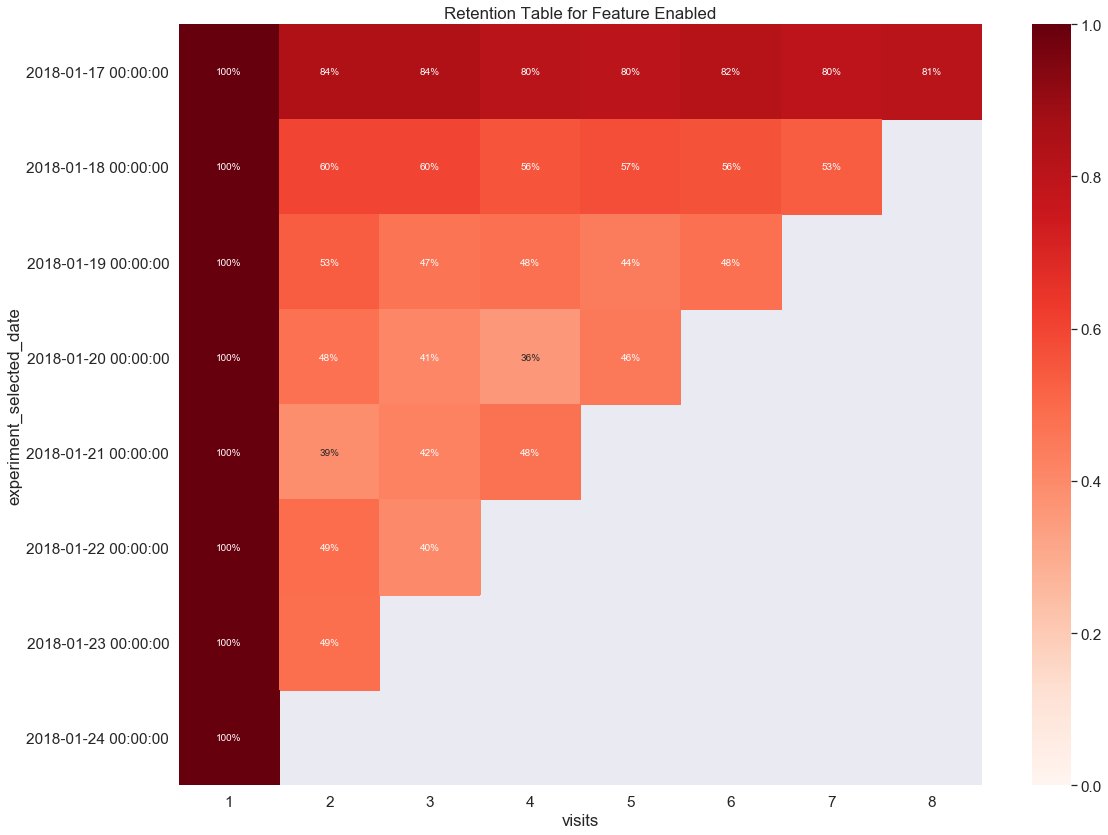

In [353]:
# Retention Rate heatmap
plt.figure(figsize=(18,14))
plt.title('Retention Table for Feature Enabled')
ax = sns.heatmap(data=retention_feature_1, annot=True, fmt='.0%', vmin=0.0, vmax=1,cmap='Reds')
ax.set_yticklabels(retention.index)
fig=ax.get_figure()
fig.savefig("Retention_Rate.png")

plt.show()

<a id='conclusion'></a>
## Conclusion

By analysing a few KPIs such as conversion rate, average game played and average revenue in the test results, we can conclude the following points:
* The treatment increased the conversion rate revenue and games played by 11% and 126% respectively.
* The treatment increased the overall average number of revenue during the period of abtest
* The treatment increased the overall retentation of users
*  The overall test is successful since the treatment did confidently increse the conversion rate. However, the new treatment will not showing significant increase in customer engagement e.g. average game rounds/player/day

For further investigation, we may want to monitor group B for a bit longer time and study player loyalty and player behavior after conversion.

The introduced treatment might be:

* Increase of difficulty so that players get more frustrated and played less and bought more boosters/lives
* Increase of waiting time before getting new lives, or getting less lives per time, since players are playing less frequently, while some are buying more lives.